# TRABAJO PRÁCTICO N°2
Grupo: Valeriano Jurado, Brian Luciano ; Zerpa, Margarita

In [3]:
import imageio.v2 as imageio
import numpy as np 
import matplotlib.pyplot as plt

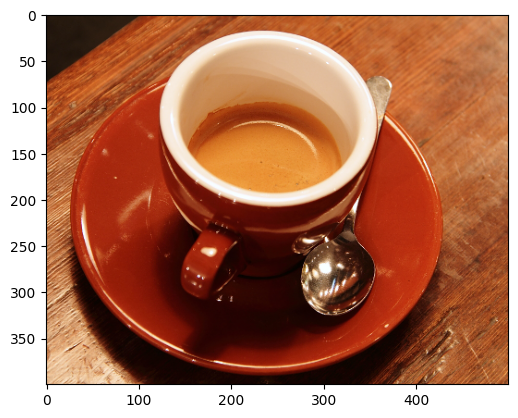

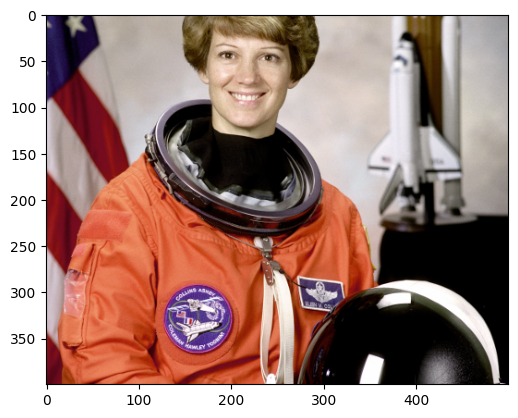

In [4]:
im1 = imageio.imread('imageio:coffee.png')[:,50:550,:]/255.

plt.imshow(im1)
plt.show()

im2=imageio.imread('imageio:astronaut.png')[56:456,6:506,:]/255.

plt.imshow(im2)
plt.show()

In [19]:
# Normalizar los valores de RGB del pixel: dividir los valores 0 a 255 por 255 
#para obtener valores en el rango de 0 a 1. (no se usa)
def normalize_rgb(img):
    return np.clip(img /255.,0.,1.)

In [12]:
#Convertir R’G’B’ a bytes y graficar el pixel
def RGB_to_bytes(img):
    return np.clip(img,0.,1.)

In [6]:
def RGB_to_YIQ(rgb):
    yiq = np.zeros(rgb.shape)
    yiq[:, :, 0] = 0.229 * rgb[:, :, 0] + 0.587 * rgb[:, :, 1] + 0.114 * rgb[:, :, 2]
    yiq[:, :, 1] = 0.595716 * rgb[:, :, 0] - 0.274453 * rgb[:, :, 1] - 0.321263 * rgb[:, :, 2]
    yiq[:, :, 2] = 0.211456 * rgb[:, :, 0] - 0.522591 * rgb[:, :, 1] + 0.311135 * rgb[:, :, 2]
    return yiq

In [7]:
def YIQ_to_RGB(yiq):
    rgb = np.zeros(yiq.shape)
    rgb[:, :, 0] = yiq[:, :, 0] + 0.9663 * yiq[:, :, 1] + 0.6210 * yiq[:, :, 2]
    rgb[:, :, 1] = yiq[:, :, 0] - 0.2721 * yiq[:, :, 1] - 0.6474 * yiq[:, :, 2]
    rgb[:, :, 2] = yiq[:, :, 0] - 1.1070 * yiq[:, :, 1] + 1.7046 * yiq[:, :, 2]
    return rgb

In [1]:
#SUMA CLAMPEADA
#YC := YA + YB; If YC > 1 then YC:=1;
def suma_clampeada(A , B):
    
    s_clam = np.zeros(A[:, :, 0].shape)
    
    s_clam = A[:, :, 0] + B[:, :, 0]
    
    #If YC > 1 then YC:=1
    #print('Salida previa:',s_clam) 
    s_clam[s_clam > 1] = 1
    #print('Salida modificada: ',s_clam)
    return s_clam

In [43]:
#PRUEBA DE SUMA CLAMPEADA
suma_clampeada(im1,im2)  #funciona correctamente

Salida previa: [[0.6745098  0.49411765 0.36470588 ... 1.38431373 1.4        1.40784314]
 [0.59215686 0.38431373 0.31372549 ... 1.38823529 1.4        1.39215686]
 [0.50196078 0.31764706 0.32156863 ... 1.39215686 1.4        1.39215686]
 ...
 [1.24313725 1.22352941 1.20784314 ... 0.51372549 0.53333333 0.65490196]
 [1.23137255 1.20784314 1.20784314 ... 0.52941176 0.61568627 0.69019608]
 [1.25882353 1.21176471 1.25490196 ... 0.69803922 0.6627451  0.78039216]]
Salida modificada:  [[0.6745098  0.49411765 0.36470588 ... 1.         1.         1.        ]
 [0.59215686 0.38431373 0.31372549 ... 1.         1.         1.        ]
 [0.50196078 0.31764706 0.32156863 ... 1.         1.         1.        ]
 ...
 [1.         1.         1.         ... 0.51372549 0.53333333 0.65490196]
 [1.         1.         1.         ... 0.52941176 0.61568627 0.69019608]
 [1.         1.         1.         ... 0.69803922 0.6627451  0.78039216]]


array([[0.6745098 , 0.49411765, 0.36470588, ..., 1.        , 1.        ,
        1.        ],
       [0.59215686, 0.38431373, 0.31372549, ..., 1.        , 1.        ,
        1.        ],
       [0.50196078, 0.31764706, 0.32156863, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 0.51372549, 0.53333333,
        0.65490196],
       [1.        , 1.        , 1.        , ..., 0.52941176, 0.61568627,
        0.69019608],
       [1.        , 1.        , 1.        , ..., 0.69803922, 0.6627451 ,
        0.78039216]])

In [48]:
#RESTA CLAMPEADA
#YC := YA - YB; If YC > 1 then YC:=1;
def resta_clampeada(A , B):
    
    r_clam = np.zeros(A[:, :, 0].shape)
    
    r_clam = A[:, :, 0] - B[:, :, 0]
    
    #If YC < 0 then YC:=0
    print('Luminansia previa:',r_clam) 
    r_clam[r_clam < 0] = 0
    print('Luminansia modificada: ',r_clam)
    return r_clam

In [49]:
#PRUEBA DE RESTA CLAMPEADA
resta_clampeada(yiq1,yiq2) #funciona correctamente

Luminansia previa: [[-0.37102353 -0.20260392 -0.09252549 ...  0.02424706  0.03063922
   0.05252157]
 [-0.29986667 -0.11448627 -0.05138039 ...  0.03332549  0.02289804
   0.04477255]
 [-0.21527843 -0.06834118 -0.05547843 ...  0.00280392 -0.00083922
   0.03063137]
 ...
 [ 0.53671765  0.56903529  0.58451765 ...  0.29033725  0.30121961
   0.39970588]
 [ 0.54759216  0.55893333  0.56532549 ...  0.30908235  0.37646667
   0.39723922]
 [ 0.55815294  0.55983137  0.6291098  ...  0.23107059  0.38398039
   0.46290588]]
Luminansia modificada:  [[0.         0.         0.         ... 0.02424706 0.03063922 0.05252157]
 [0.         0.         0.         ... 0.03332549 0.02289804 0.04477255]
 [0.         0.         0.         ... 0.00280392 0.         0.03063137]
 ...
 [0.53671765 0.56903529 0.58451765 ... 0.29033725 0.30121961 0.39970588]
 [0.54759216 0.55893333 0.56532549 ... 0.30908235 0.37646667 0.39723922]
 [0.55815294 0.55983137 0.6291098  ... 0.23107059 0.38398039 0.46290588]]


array([[0.        , 0.        , 0.        , ..., 0.02424706, 0.03063922,
        0.05252157],
       [0.        , 0.        , 0.        , ..., 0.03332549, 0.02289804,
        0.04477255],
       [0.        , 0.        , 0.        , ..., 0.00280392, 0.        ,
        0.03063137],
       ...,
       [0.53671765, 0.56903529, 0.58451765, ..., 0.29033725, 0.30121961,
        0.39970588],
       [0.54759216, 0.55893333, 0.56532549, ..., 0.30908235, 0.37646667,
        0.39723922],
       [0.55815294, 0.55983137, 0.6291098 , ..., 0.23107059, 0.38398039,
        0.46290588]])

In [51]:
#SUMA PROMEDIADA
#YC := (YA + YB) / 2;

def suma_promediada(A , B):
    
    s_prom = np.zeros(A[:, :, 0].shape)
    
    s_prom = (A[:, :, 0] + B[:, :, 0]) / 2
    
    return  s_prom

In [53]:
#RESTA PROMEDIADA
#YC := (YA - YB) / 2;

def resta_promediada(A , B):
    
    r_prom = np.zeros(A[:, :, 0].shape)
    
    r_prom = (A[:, :, 0] - B[:, :, 0]) / 2
    
    return r_prom

# IF LIGTHER

La operación "If lighter" (en español, "si es más claro") es una operación que se utiliza en el procesamiento de imágenes y gráficos para combinar dos imágenes o elementos gráficos de manera que el resultado tenga el valor de píxel más claro entre las dos fuentes. Esto se hace comparando los valores de luminancia o brillo en cada píxel de las dos imágenes y seleccionando el valor más claro para el píxel resultante.

In [1]:
#FUNCION IL_LIGTHER

def if_lighter(image_A, image_B):
    # Extraer los componentes Y de las imágenes A y B
    YA = image_A[:, :, 0]
    YB = image_B[:, :, 0]

    # Inicializar las matrices de salida para Y, I y Q
    YC = np.zeros(YA.shape)
    IC = np.zeros(YA.shape)
    QC = np.zeros(YA.shape)

    # Aplicar la operación if-lighter
    mask = YA > YB
    YC[mask] = YA[mask]
    IC[mask] = image_A[mask, :, 1]
    QC[mask] = image_A[mask, :, 2]
    
    mask = ~mask  # Negar la máscara para el caso opuesto
    YC[mask] = YB[mask]
    IC[mask] = image_B[mask, :, 1]
    QC[mask] = image_B[mask, :, 2]

    # Combinar los componentes Y, I y Q en la imagen de salida
    image_C = np.stack((YC, IC, QC), axis=-1)

    return image_C

# IF DARKER
La operación "If-darker" (en español, "si es más oscuro") es el complemento de la operación "If-lighter". Al igual que "If-lighter", se utiliza en el procesamiento de imágenes y gráficos para combinar dos imágenes o elementos gráficos de manera que el resultado tenga el valor de píxel más oscuro entre las dos fuentes. Esto se hace comparando los valores de luminancia o brillo en cada píxel de las dos imágenes y seleccionando el valor más oscuro para el píxel resultante.

In [2]:
#FUNCION IF_DARKER

def if_darker(image_A, image_B):
    # Extraer los componentes Y de las imágenes A y B
    YA = image_A[:, :, 0]
    YB = image_B[:, :, 0]

    # Inicializar las matrices de salida para Y, I y Q
    YC = np.zeros(YA.shape)
    IC = np.zeros(YA.shape)
    QC = np.zeros(YA.shape)

    # Aplicar la operación if-darker
    mask = YA < YB  # En lugar de YA > YB, ahora comparamos si YA es menor que YB
    YC[mask] = YA[mask]
    IC[mask] = image_A[mask, :, 1]
    QC[mask] = image_A[mask, :, 2]
    
    mask = ~mask  # Negar la máscara para el caso opuesto
    YC[mask] = YB[mask]
    IC[mask] = image_B[mask, :, 1]
    QC[mask] = image_B[mask, :, 2]

    # Combinar los componentes Y, I y Q en la imagen de salida
    image_C = np.stack((YC, IC, QC), axis=-1)

    return image_C

In [4]:
#Resta de dos imágenes implementando el valor absoluto

def abs_diferencia(image_A, image_B):
    # Restar los valores de píxeles correspondientes entre las dos imágenes
    diferencia = image_A - image_B

    # Aplicar valor absoluto a la diferencia
    diferencia = np.abs(diferencia)

    return diferencia

In [14]:
#PRUEBA DE RESTA ABSOLUTA
abs_diferencia(yiq1,yiq2)

array([[[3.71023529e-01, 2.21266824e-02, 1.21539294e-02],
        [2.02603922e-01, 4.62474941e-02, 3.86060510e-02],
        [9.25254902e-02, 8.49358588e-02, 6.98912784e-02],
        ...,
        [2.42470588e-02, 2.17728769e-01, 1.60856157e-02],
        [3.06392157e-02, 2.10536776e-01, 1.53038196e-02],
        [5.25215686e-02, 2.10536776e-01, 1.53038196e-02]],

       [[2.99866667e-01, 3.20219529e-02, 1.86455137e-02],
        [1.14486275e-01, 6.51453176e-02, 5.69081098e-02],
        [5.13803922e-02, 9.28621255e-02, 8.37511294e-02],
        ...,
        [3.33254902e-02, 2.07833498e-01, 9.59403137e-03],
        [2.28980392e-02, 2.11796631e-01, 1.65239569e-02],
        [4.47725490e-02, 2.02084929e-01, 1.33018863e-02]],

       [[2.15278431e-01, 4.19423490e-02, 4.68035569e-02],
        [6.83411765e-02, 8.38595725e-02, 7.19406549e-02],
        [5.54784314e-02, 8.92661294e-02, 8.33602314e-02],
        ...,
        [2.80392157e-03, 2.06757212e-01, 1.16434078e-02],
        [8.39215686e-04, 2.11

In [8]:
def interpolacion(image_A,image_B):
   
    IC = np.zeros(image_A.shape)
    QC = np.zeros(image_A.shape)
    
    #IC := (YA * IA + YB * IB) / (YA + YB) ;
    IC = (image_A[:, :, 0] * image_A[:, :, 1] + image_B[:, :, 0] * image_B[:, :, 1])/(image_A[:, :, 0]+image_B[:, :, 0])
    
    #QC := (YA * QA + YB * QB) / (YA + YB) ; 
    QC = (image_A[:, :, 0] * image_A[:, :, 2] + image_B[:, :, 0] * image_B[:, :, 2])/(image_A[:, :, 0]+image_B[:, :, 0])
    
    return IC,QC

# Prueba de Funciones

In [9]:
yiq1=RGB_to_YIQ(im1)
yiq2=RGB_to_YIQ(im2)

(-0.5, 499.5, 399.5, -0.5)

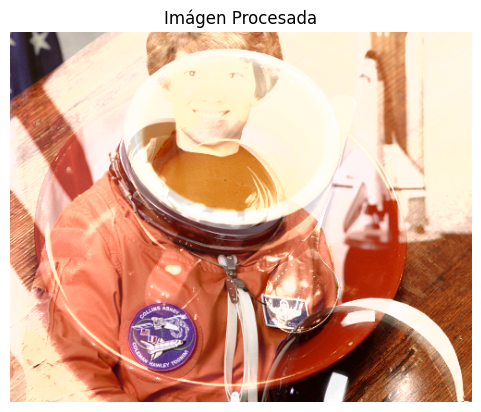

In [15]:
#
yiq3 = np.zeros(yiq1.shape)

#CUASI-SUMAS EN LUMINANCIAS
#yiq3[:, :, 0] = yiq1[:,:,0]+yiq2[:,:,0]
YC = suma_clampeada(yiq1,yiq2) #SUMA CLAMPEADA

#INTERPOLACION
#IC = (yiq1[:,:,0]*yiq1[:,:,1]+yiq2[:,:,0]*yiq2[:,:,1])/(yiq1[:,:,0]+yiq2[:,:,0])
#QC = (yiq1[:,:,0]*yiq1[:,:,2]+yiq2[:,:,0]*yiq2[:,:,2])/(yiq1[:,:,0]+yiq2[:,:,0])
IC,QC = interpolacion(yiq1,yiq2)

#plt.figure(0)
#plt.imshow(YC)
#plt.figure(1)
#plt.imshow(IC)
#plt.figure(2)
#plt.imshow(QC)

yiq3[:,:,0] = YC
yiq3[:,:,1] = IC
yiq3[:,:,2] = QC

#MOSTRAMOS LA IMAGEN RESULTANTE
img_resultado = RGB_to_bytes(YIQ_to_RGB(yiq3))

plt.imshow(img_resultado)
plt.title("Imágen Procesada")
plt.axis('off')

# Interfaz Grafica

In [1]:
import tkinter as tk
from tkinter import ttk
from PIL import Image, ImageTk

In [2]:
def manipulate_image():
    seleccion = combobox.get()
    if seleccion:
        mensaje = f"Seleccionaste la operacion {seleccion}"
        messagebox.showinfo("Identificación", mensaje)

In [3]:
def cerrar_aplicacion():
    ventana.quit()

In [6]:
# Ventana principal
ventana = tk.Tk()
ventana.title("Aritmetica de pixeles")

# Frame para organizar los widgets
frame = ttk.Frame(ventana, padding=10)
frame.grid(row=0, column=0, sticky=(tk.W, tk.E, tk.N, tk.S))

# Convertir la imagen original a formato Tkinter PhotoImage
imagen_pillow = Image.open('Charly.bmp')
imagen_tk = ImageTk.PhotoImage(imagen_pillow)

label_imagen = ttk.Label(frame)
label_imagen.grid(row=0, columnspan=2,padx=10, pady=10)
# Mostrar la imagen en el Frame
label_imagen.config(image=imagen_tk)
# Mantener una referencia para evitar que sea eliminada por el recolector de basura
label_imagen.image = imagen_tk

# Etiquetas
label_a = ttk.Label(frame, text="Operacion a realizar :", font=('Arial',10))
label_a.grid(row=1, column=0, padx=5, pady=5)

# Crear el Combobox con las opciones
opciones = ["Suma", "Resta", "Producto","Promedio"]
combobox = ttk.Combobox(ventana, values=opciones)
combobox.set("Seleccione una opción")  # Texto predeterminado en el Combobox
combobox.grid(row=1, column=1, padx=5, pady=5)

# Botón para aplicar la manipulación
button_manipulate = ttk.Button(frame, text="Aplicar Manipulación", command=manipulate_image)
button_manipulate.grid(row=3, column=1, padx=5, pady=5)

# Botón para cerrar la aplicacion
button_manipulate = ttk.Button(frame, text="Salir", command=cerrar_aplicacion)
button_manipulate.grid(row=3, column=2, padx=5, pady=10)

#Texto derechos reservados
label_texto = ttk.Label(frame, text="@Copright 2023 - Derechos reservados Valeriano - Zerpa", font=('Arial',7))
label_texto.grid(row=5, columnspan=2, padx=5, pady=5)


# Iniciar la aplicación
ventana.mainloop()


TclError: image "pyimage1" doesn't exist